# Importando e tratando a base de dados

><h3>Importação dos dados

In [1]:
import requests
from io import StringIO

# parameters for the request
owner = 'danplevs'
token = '10972548eeae219489116329ded0f3850ddeec5a'
repo = 'geohmount'
path = 'geohmount-plotly/trajs/resultado-angulos_velocidades-SB.csv'

# sending the request
r = requests.get(f'https://api.github.com/repos/{owner}/{repo}/contents/{path}',
    headers={
        'accept': 'application/vnd.github.v3.raw',
        'authorization': f'token {token}'
            }
    )

#convert string to StringIO object
string_io_obj = StringIO(r.text)

In [2]:
import pandas as pd

trajs = pd.read_csv(string_io_obj, sep=";")
trajs.head(5)

,data,altitude,campanha,direcao_graus,velocidade_km/h
0,2018-01-01 22:00:00,509.0,NaN,113.428693,10.102930
1,2018-01-01 22:00:00,659.0,NaN,122.735226,8.571308
2,2018-01-01 22:00:00,909.0,NaN,150.046392,7.013839
3,2018-01-03 22:00:00,509.0,NaN,221.531771,19.262928
4,2018-01-03 22:00:00,659.0,NaN,225.824343,20.249391


><h3>Tratamento dos dados

>>Renomeando colunas

In [3]:
trajs = trajs.rename(columns={'data': 'data_full', 'direcao_graus': 'direção_graus', 'velocidade_km/h': 'velocidade'})

>>Removendo trajetórias sem campanha

In [4]:
trajs = trajs.dropna()
trajs

,data_full,altitude,campanha,direção_graus,velocidade
693,2018-07-10 19:00:00,509.0,SB180801 - PP1,230.969023,27.314427
694,2018-07-10 19:00:00,659.0,SB180801 - PP1,232.328520,27.977538
695,2018-07-10 19:00:00,909.0,SB180801 - PP1,237.879287,27.120313
696,2018-07-10 22:00:00,509.0,SB180801 - PP1,232.585556,30.345171
697,2018-07-10 22:00:00,659.0,SB180801 - PP1,234.069293,31.419221
...,...,...,...,...,...
1741,2019-06-06 01:00:00,659.0,SB190615 - PP1,105.838000,15.096090
1742,2019-06-06 01:00:00,909.0,SB190615 - PP1,109.106353,16.677733
1743,2019-06-06 04:00:00,509.0,SB190615 - PP1,93.521453,13.415330
1744,2019-06-06 04:00:00,659.0,SB190615 - PP1,101.023456,16.160172


>>Criando a coluna de sentidos das trajetórias

In [5]:
sentidos_switcher = {0: "N", # dicionário com os sentidos de acordo com a rosa dos ventos
        1: "NNE",
        2: "NE",
        3: "ENE",
        4: "E",
        5: "ESE",
        6: "SE",
        7: "SSE",
        8: "S",
        9: "SSW",
        10: "SW",
        11: "WSW",
        12:"W",
        13:"WNW",
        14:"NW",
        15:"NNW",
}
sentidos = list() #lista que vai armazenar os sentidos
for value in trajs['direção_graus']: 
  quociente = value // 22.5
  resto = value % 22.5              # laço de repetição que atribui um número inteiro de acordo com cada direção em graus
  if resto > 11.25: 
    quociente += 1
  sentidos.append(sentidos_switcher.get(quociente))
trajs['direção'] = sentidos
trajs.head(10)

,data_full,altitude,campanha,direção_graus,velocidade,direção
693,2018-07-10 19:00:00,509.0,SB180801 - PP1,230.969023,27.314427,SW
694,2018-07-10 19:00:00,659.0,SB180801 - PP1,232.328520,27.977538,SW
695,2018-07-10 19:00:00,909.0,SB180801 - PP1,237.879287,27.120313,WSW
696,2018-07-10 22:00:00,509.0,SB180801 - PP1,232.585556,30.345171,SW
697,2018-07-10 22:00:00,659.0,SB180801 - PP1,234.069293,31.419221,SW
698,2018-07-10 22:00:00,909.0,SB180801 - PP1,239.796762,31.939966,WSW
699,2018-07-11 02:00:00,509.0,SB180801 - PP1,236.968476,32.311479,WSW
700,2018-07-11 02:00:00,659.0,SB180801 - PP1,236.969017,34.768412,WSW
701,2018-07-11 02:00:00,909.0,SB180801 - PP1,240.470368,37.407155,WSW
702,2018-07-11 01:00:00,509.0,SB180801 - PP1,235.627292,33.568678,SW


>>Criando a coluna categórica de velocidades

In [6]:
velocidades_switcher = {0: '0-5 km/h', #dicionário com as velocidades categóricas
               1: '5-10 km/h',
               2: '10-15 km/h',
               3: '15-20 km/h',
               4: '20-25 km/h',
               5: '25-30 km/h',
               6: '30-35 km/h',
               7: '35-40 km/h',
               8: '40-45 km/h',
}
velocidades = list()
for value in trajs['velocidade']:
  quociente = value // 5
  velocidades.append(velocidades_switcher.get(quociente))
trajs['velocidade_cat'] = velocidades
trajs.head(10)

,data_full,altitude,campanha,direção_graus,velocidade,direção,velocidade_cat
693,2018-07-10 19:00:00,509.0,SB180801 - PP1,230.969023,27.314427,SW,25-30 km/h
694,2018-07-10 19:00:00,659.0,SB180801 - PP1,232.328520,27.977538,SW,25-30 km/h
695,2018-07-10 19:00:00,909.0,SB180801 - PP1,237.879287,27.120313,WSW,25-30 km/h
696,2018-07-10 22:00:00,509.0,SB180801 - PP1,232.585556,30.345171,SW,30-35 km/h
697,2018-07-10 22:00:00,659.0,SB180801 - PP1,234.069293,31.419221,SW,30-35 km/h
698,2018-07-10 22:00:00,909.0,SB180801 - PP1,239.796762,31.939966,WSW,30-35 km/h
699,2018-07-11 02:00:00,509.0,SB180801 - PP1,236.968476,32.311479,WSW,30-35 km/h
700,2018-07-11 02:00:00,659.0,SB180801 - PP1,236.969017,34.768412,WSW,30-35 km/h
701,2018-07-11 02:00:00,909.0,SB180801 - PP1,240.470368,37.407155,WSW,35-40 km/h
702,2018-07-11 01:00:00,509.0,SB180801 - PP1,235.627292,33.568678,SW,30-35 km/h


>>Criando a coluna categórica de data já formata em 'mês, ano'

In [7]:
trajs['data'] = pd.to_datetime(trajs['data_full'])
trajs['data'] = trajs['data'].dt.strftime('%B, %Y')
trajs.head()

,data_full,altitude,campanha,direção_graus,velocidade,direção,velocidade_cat,data
693,2018-07-10 19:00:00,509.0,SB180801 - PP1,230.969023,27.314427,SW,25-30 km/h,"July, 2018"
694,2018-07-10 19:00:00,659.0,SB180801 - PP1,232.328520,27.977538,SW,25-30 km/h,"July, 2018"
695,2018-07-10 19:00:00,909.0,SB180801 - PP1,237.879287,27.120313,WSW,25-30 km/h,"July, 2018"
696,2018-07-10 22:00:00,509.0,SB180801 - PP1,232.585556,30.345171,SW,30-35 km/h,"July, 2018"
697,2018-07-10 22:00:00,659.0,SB180801 - PP1,234.069293,31.419221,SW,30-35 km/h,"July, 2018"


>>Criando datasets separados por altitude

In [8]:
trajs_509 = trajs.loc[trajs['altitude'] == 509]
trajs_659 = trajs.loc[trajs['altitude'] == 659]
trajs_909 = trajs.loc[trajs['altitude'] == 909]

# Criando o gráfico

In [9]:
!pip install --upgrade plotly

Requirement already up-to-date: plotly in c:\users\daniel\anaconda3\lib\site-packages (4.10.0)


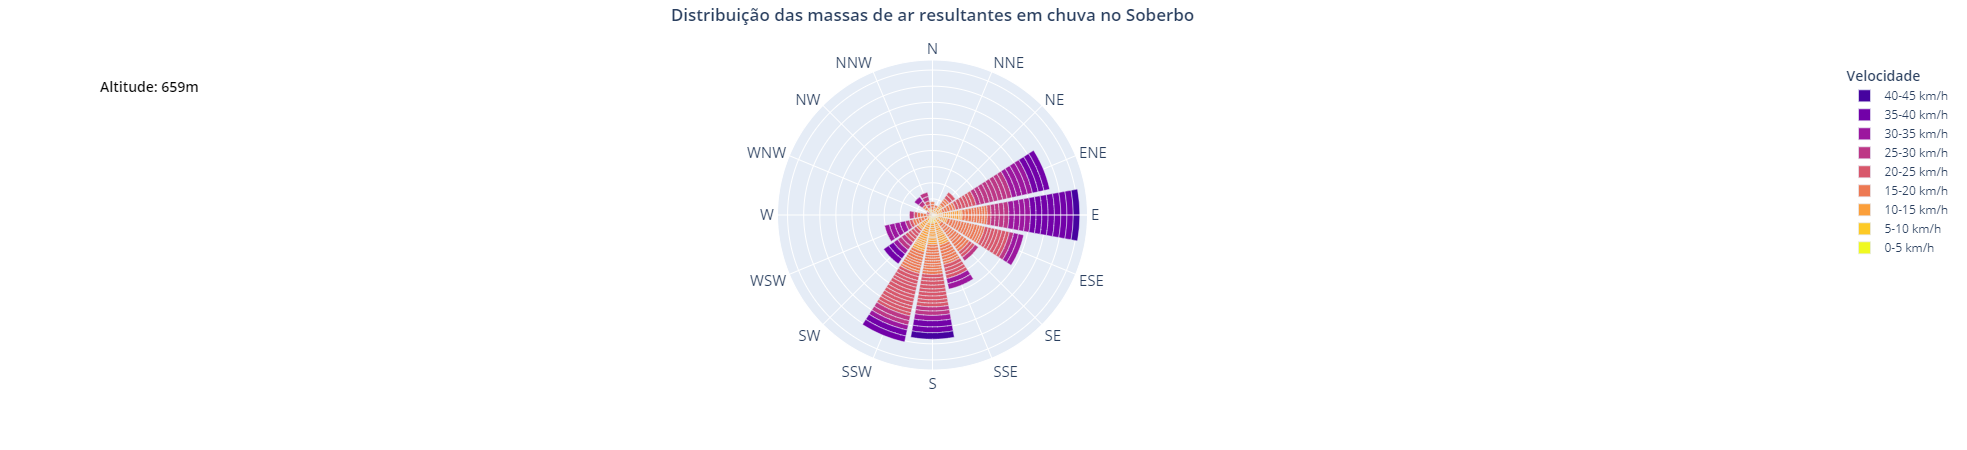

In [28]:
import plotly.express as px
import plotly.graph_objects as go

velocidade_cat = ['0-5 km/h', '5-10 km/h', '10-15 km/h', '15-20 km/h', '20-25 km/h', '25-30 km/h', '30-35 km/h', '35-40 km/h','40-45 km/h']
dir_cat = ["N", "NNE", "NE", "ENE", "E", "ESE", "SE", "SSE", "S", "SSW", "SW", "WSW", "W", "WNW", "NW", "NNW"]

date = trajs_659['data']
fig = px.bar_polar(trajs_659,r='velocidade', theta='direção', color='velocidade_cat', 
                   category_orders={'velocidade_cat': velocidade_cat,
                                    'direção': dir_cat}, 
                   color_discrete_sequence = px.colors.sequential.Plasma_r,
                   hover_data={'data': True}
)

fig.update_layout(legend=dict(
     traceorder='reversed',
     yanchor='top',
     y=0.99,
     xanchor='right',
     x=1.1,
     title_font_size=14),
     legend_title_text='<b>Velocidade',
     title={'text': '<b>Distribuição das massas de ar resultantes em chuva no Soberbo',
            'y': 0.98, 'x': 0.5, 'xref': 'paper'},
     font_family='Open Sans',
     polar_radialaxis_showticklabels=False,
     annotations=[dict(
        showarrow=False,
        xref='paper',
        yref='paper',
        x=0.01, y=0.95,
        text='<b>Altitude: 659m',
        font=dict(size=14, color='black'))],
     polar_angularaxis_tickfont_size = 15,
     paper_bgcolor='rgba(0, 0, 0, 0)'
)

fig.update_traces(hovertemplate=
                  '<b>%{theta}</b><br>'+
                  'velocidade (km/h): %{r:.1f}<br>')

fig.show()
fig.write_image('trajsSB.png', width=800, height=600)

# Criando os gráficos por mês

In [17]:
import plotly.express as px

campaigns = trajs_659['campanha'].unique()

velocidade_cat = ['0-5 km/h', '5-10 km/h', '10-15 km/h', '15-20 km/h', '20-25 km/h', '25-30 km/h', '30-35 km/h', '35-40 km/h', '40-45 km/h']
dir_cat = ["N", "NNE", "NE", "ENE", "E", "ESE", "SE", "SSE", "S", "SSW", "SW", "WSW", "W", "WNW", "NW", "NNW"]

for c in campaigns:
    df = trajs_659.loc[trajs_659.campanha == c]
        
    fig = px.bar_polar(df, r='velocidade', theta='direção', color='velocidade_cat', 
                      category_orders={'velocidade_cat': velocidade_cat,
                                      'direção': dir_cat}, 
                       color_discrete_sequence = px.colors.sequential.Plasma_r,
                       hover_data={'data': True})

    fig.update_layout(legend=dict(
         traceorder='reversed',
         yanchor='top',
         y=0.99,
         xanchor='right',
         x=1.1,
         title=dict(
             text='<b>Velocidade', 
             font={'size': 14})),
         font_family='Open Sans',
         polar_radialaxis_showticklabels=False,
         polar_angularaxis_tickfont_size = 15,
         paper_bgcolor='rgba(0, 0, 0, 0)')

    fig.show()